In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

%matplotlib inline
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['HAM10000_metadata.csv', 'hmnist_8_8_L.csv', 'ham10000_images_part_2', 'hmnist_8_8_RGB.csv', 'hmnist_28_28_RGB.csv', 'hmnist_28_28_L.csv', 'ham10000_images_part_1']


In [2]:
skin_df=pd.read_csv("../input/HAM10000_metadata.csv")

In [3]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
base_skin_dir = os.path.join('..', 'input')
print(base_skin_dir)

../input


In [5]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                    for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

In [6]:
skin_df['path'] = skin_df['image_id'].map(imageid_path_dict.get)

In [7]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/ham10000_images_part_2/ISIC_0031633.jpg
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,../input/ham10000_images_part_1/ISIC_0027850.jpg
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,../input/ham10000_images_part_1/ISIC_0029176.jpg
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,../input/ham10000_images_part_1/ISIC_0029068.jpg
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,../input/ham10000_images_part_1/ISIC_0025837.jpg
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,../input/ham10000_images_part_1/ISIC_0025209.jpg


In [8]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}


In [9]:
skin_df['target'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['target_cat'] = pd.Categorical(skin_df['target']).codes

In [10]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,target,target_cat
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../input/ham10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../input/ham10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2


In [11]:
label_cat_ids=dict(zip(skin_df['target_cat'],skin_df['dx']))

In [12]:
label_cat_ids

{2: 'bkl', 4: 'nv', 3: 'df', 5: 'mel', 6: 'vasc', 1: 'bcc', 0: 'akiec'}

In [13]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)

In [14]:
skin_df['target'].value_counts()

Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: target, dtype: int64

In [15]:
skin_df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

In [16]:
skin_df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [17]:
skin_df['dx_type'].value_counts()

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64

In [18]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,100))))

In [19]:


classes = list(skin_df['dx'].unique())
train_data = pd.DataFrame(columns = list(skin_df.columns))
test_data = pd.DataFrame(columns = list(skin_df.columns))



In [20]:


def split(temp_df,split_ratio):
    train, test = train_test_split(temp_df, test_size=split_ratio)
    return train,test



In [21]:
from sklearn.model_selection import train_test_split
for cl in classes:
    mask= skin_df['dx']==cl
    temp_df = skin_df[mask]
    if cl=='nv':
        split_ratio=0.65
    else:
        split_ratio=0.2
    trn,tst = split(temp_df,split_ratio)
    train_data=pd.concat([train_data,trn],ignore_index = True)
    test_data=pd.concat([test_data,tst],ignore_index = True)
    

In [22]:
train_data.head()
print(len(train_data))
print(len(test_data))



4992
5023


In [23]:
train_data['image'].map(lambda x: x.shape).value_counts()

(100, 100, 3)    4992
Name: image, dtype: int64

In [24]:
features=train_data.drop(columns=['target_cat'],axis=1)
target=train_data['target_cat']

In [25]:
x_test=test_data.drop(columns=['target_cat'],axis=1)
y_test=test_data['target_cat']

In [26]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)

In [27]:
x_train = np.asarray(x_train_o['image'].tolist())
x_validate = np.asarray(x_test_o['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_valid_mean = np.mean(x_validate)
x_valid_std = np.std(x_validate)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_validate = (x_validate - x_valid_mean)/x_valid_std
x_test = (x_test - x_test_mean)/x_test_std


In [28]:
from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train_o, num_classes = 7)
y_validate = to_categorical(y_test_o, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

Using TensorFlow backend.


In [29]:
x_train = x_train.reshape(x_train.shape[0], *(100, 100, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 100, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 100, 3))

In [30]:

from PIL import Image
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical 

from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split

In [31]:
input_shape = (100, 100, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [32]:
# Define the optimizer
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.9, decay=0.0)

In [33]:
# Compile the model
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [34]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
model_check_point = ModelCheckpoint(filepath="best_model.h5", verbose=1, save_best_only=True)

early_stopping=EarlyStopping(monitor='val_acc', patience=10, verbose=1)

In [35]:
datagen = ImageDataGenerator(
        rotation_range=25,
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(x_train)

In [36]:
# Fit the model
epochs = 50 
batch_size = 10
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction,model_check_point,early_stopping])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
399/399 [==============================] - 12s 31ms/step - loss: 1.4358 - acc: 0.4677 - val_loss: 1.3919 - val_acc: 0.5055

Epoch 00001: val_loss improved from inf to 1.39187, saving model to best_model.h5
Epoch 2/50
399/399 [==============================] - 10s 24ms/step - loss: 1.3287 - acc: 0.4859 - val_loss: 1.2834 - val_acc: 0.5125

Epoch 00002: val_loss improved from 1.39187 to 1.28344, saving model to best_model.h5
Epoch 3/50
399/399 [==============================] - 11s 27ms/step - loss: 1.2957 - acc: 0.5031 - val_loss: 1.2219 - val_acc: 0.5315

Epoch 00003: val_loss improved from 1.28344 to 1.22187, saving model to best_model.h5
Epoch 4/50
399/399 [==============================] - 10s 24ms/step - loss: 1.2631 - acc: 0.5109 - val_loss: 1.1568 - val_acc: 0.5255

Epoch 00004: val_loss improved from 1.22187 to 1.15685, saving model to best_model.h5
Epoch 5/50
399/399 [==============================] - 10s 24ms/step - lo

In [37]:
from keras.models import load_model
model = load_model('best_model.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
model.save("model.h5")

999/999 [==============================] - 0s 335us/step
Validation: accuracy = 0.657658  ;  loss_v = 0.897697
Test: accuracy = 0.788772  ;  loss = 0.571311


In [38]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


999/999 [==============================] - 0s 299us/step
Validation: accuracy = 0.657658  ;  loss_v = 0.897697
Test: accuracy = 0.788772  ;  loss = 0.571311


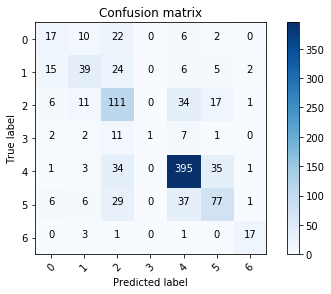

In [39]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(x_validate)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_validate,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

plot_confusion_matrix(confusion_mtx, classes = range(7)) 

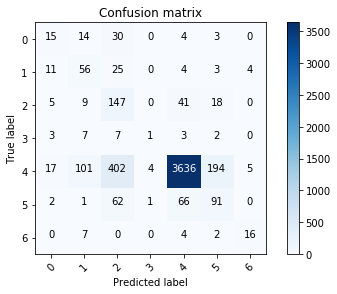

In [40]:
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [41]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

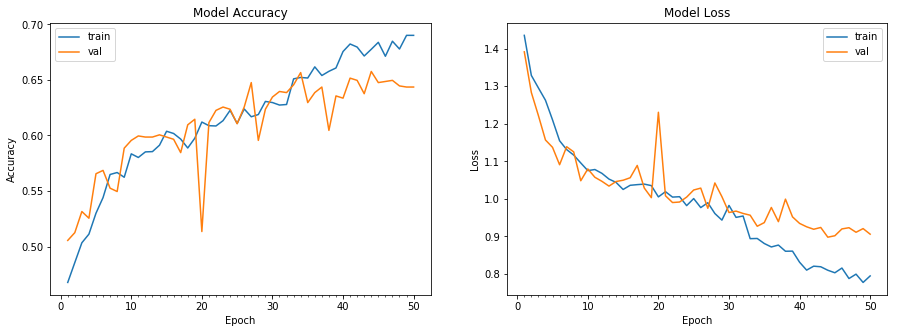

In [42]:
plot_model_history(history)